# Principle Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PCA is a statistical procedure for projecting a high dimensional dataset onto a lower dimensional space, while retaining as much of the charactersitics of the original data as possible. It has several uses: eg, dimensionality reduction, (lossy) data compression and data visualisation.

PCA is just one of a family of dimensionality reduction techniques, but it is one of the oldest such procesdues and by far the most popular.

The goal of PCA is to take a high-dimensional vector, and, using the dependencies between the variables, represent it in a more tractable, lower-dimensional form, while minimising the amount of information lost.

The key concept behind PCA is the idea of projection ...

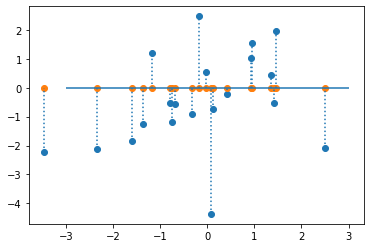

In [2]:
data = np.random.multivariate_normal([0,0],[[2.67, 0.53], [0.53, 2.67]], 20)

plt.scatter(data[:,0], data[:,1])
plt.scatter(data[:,0], np.zeros_like(data[:,1]))
plt.hlines(0, -3, 3)

plt.vlines(data[:,0], np.minimum(data[:,1], 0), np.maximum(data[:,1], 0), linestyle=':')

PCA works by first finding a dimensional vector along which the variance of the input vector is maximised. This is referred to as the first principle component. Further principle components are By projecting the orginal data onto this new component, we get a linear combination of all of the original features in a single dimension. Since this principle component was defined as the vector along which the variance of the original dataset was maximised, the projection onto the first principle component will be a linear combination of the orignal dimensions which maximises the variance of points along that line.

The second principle component is chosen based on the same criterion (maximising variance) but it must be orthogonal to PC1. For n principle components, each is chosen to maximise the variance of the projected values while being orthogonal to all previous principle components.

## Wine and PCA

"These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines."

In [3]:
df = pd.read_csv("data/wine.csv", index_col=0)
df.head()

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data = df.values[:, 1:]

Before performing PCA is is improtant to normalise the data since we are interested in maximising the variance across all features. If one component of the dataset has a greater magnitude than others, it will likely have a greater variance. Whether this is of relevance to the overall structure of the data or simply a byproduct of its magnitide is unclear.

Variances should be calculated relative to each individual axis.

Data can be normalised by subtracting the mean and dividing by the standard deviation along each individual dimension.

In [5]:
normalised_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

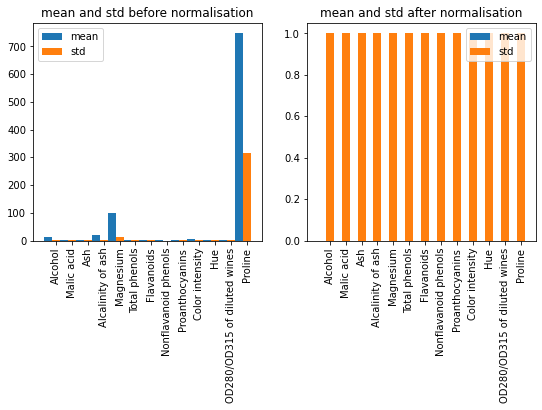

In [6]:
fig,ax = plt.subplots(1,2, figsize=(9,4))
m = ax[0].bar(np.arange(13)-0.5, np.mean(data, axis=0), width=0.5, label='mean')
s = ax[0].bar(np.arange(13), np.std(data, axis=0), width=0.5, label='std')
ax[0].legend(handles=[m,s])
ax[0].set_xticks(np.arange(13))
ax[0].set_xticklabels(df.columns[1:])
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
ax[0].set_title("mean and std before normalisation")

m = ax[1].bar(np.arange(13)-0.5, np.mean(normalised_data, axis=0), width=0.5, label='mean')
s = ax[1].bar(np.arange(13), np.std(normalised_data, axis=0), width=0.5, label='std')
ax[1].legend(handles=[m,s])
ax[1].set_xticks(np.arange(13))
ax[1].set_xticklabels(df.columns[1:])
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
ax[1].set_title("mean and std after normalisation")

plt.show()

Start by finding a projection into D = 1 dimension. In this case, the projection results in a scalar value, $x_n$, for each observation, given by $x_n=w^Ty_n$

The variance $\sigma^2$ is given by $\frac{1}{N}\sum^N_{n=1}(x_n-\bar x)^2$


Since the mean ($\bar y$) $=0$, this becomes $\frac{1}{N}\sum^N_{n=1}x_n^2$



Calculate the covariance matrix of the standardised data

In [7]:
cov = np.cov(normalised_data, rowvar=False)

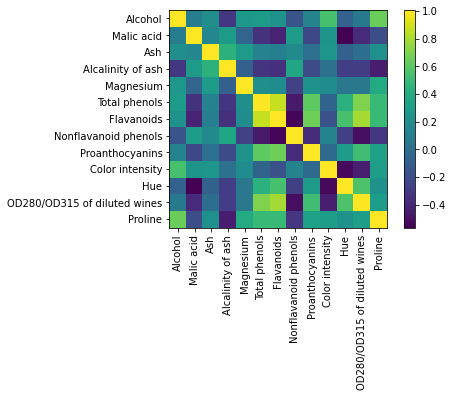

In [8]:
fig, ax = plt.subplots(1)
img = ax.imshow(cov)
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))
ax.set_yticklabels(df.columns[1:])
ax.set_xticklabels(df.columns[1:], rotation='vertical')
fig.colorbar(img)

The covariance matrix gives an idea of which features are most correlated or most independent. The covariance matrix can be represented by an ellipse whose primary axes are the eigenvectors of the covariance matrix.

These are the principal components of the dataset. Principle components can be computed from the covariance matrix by taking the eigendecomposition. Each eigenvector of the covariance matrix is a principal component and its importance is given by the square root of the absolute value of its corresponding eigenvalue.

In [9]:
evals, evecs = np.linalg.eig(cov)

evals

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

The eigenvalues for each corresponding eigenvector can be thought of as a measure of the importance of that eigenvector in explaining the data. The first principle cimponent is the eigenvector of the covariance matrix which has the largest corresponding eigenvalue.

The last step is simply to perform the pojection of the original data onto the principle components.

Projecting the original 13 dimensional set onto the first 2 principle components makes for easy visualisation of the original data.

A projection of a dataset onto an arbitrary set of vectors can be computed by forming a matrix product: $P=XV$ Where $P$ is an $N \times k$ matrix that is the result of the projection, $X$ is the $N \times D$ original data set and $V$ is an $D \times k$ matrix, where each column is a vector that the data will be projected onto.

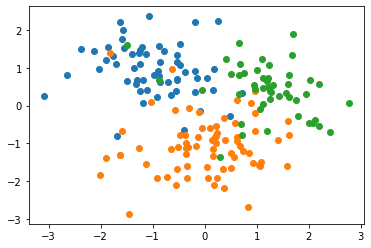

In [10]:
principle_components = evecs[np.argsort(evals)[::-1]]
data_2d = normalised_data @ principle_components[:, :2]

wine1_2d = data_2d[df['Wine'] == 1]
wine2_2d = data_2d[df['Wine'] == 2]
wine3_2d = data_2d[df['Wine'] == 3]

plt.scatter(wine1_2d[:, 0], wine1_2d[:, 1])
plt.scatter(wine2_2d[:, 0], wine2_2d[:, 1])
plt.scatter(wine3_2d[:, 0], wine3_2d[:, 1])

The original dataset comprised 3 different classes of wine. PCA successfully extracted patterns in the dataset relating to different classes of wine while reducing the size of the data by a factor of ~6

If plotting instead the last 2 principle components

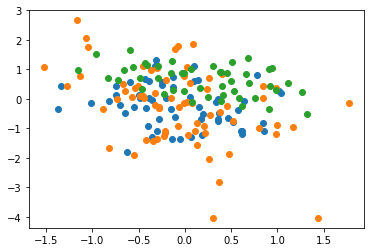

In [13]:
data_2d = normalised_data @ principle_components[:, -2:]

wine1_2d = data_2d[df['Wine'] == 1]
wine2_2d = data_2d[df['Wine'] == 2]
wine3_2d = data_2d[df['Wine'] == 3]

plt.scatter(wine1_2d[:, 0], wine1_2d[:, 1])
plt.scatter(wine2_2d[:, 0], wine2_2d[:, 1])
plt.scatter(wine3_2d[:, 0], wine3_2d[:, 1])

The separation in the data is obviously not as clear. It was no coincidence that the principle components were chosen in such a way as to reveal patterns inherent in the data.

There are a number of other ways to perform PCA, but the simplest is to maximize the variance

## The explained variance

.........

TODO